In [1]:
#Import Libraries

# for handling dataset
import pandas as pd

#for mathematical computation
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB


#preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Feature selection
from sklearn.feature_selection import RFE

#cross valodation
from sklearn.model_selection import cross_val_score,KFold

#Model Evaluation
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve,auc



from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
att_dataset = pd.read_csv("C:\\Users\\dell\\Desktop\\DS\\DS with Python\\Assignments\\Attrition Case Study.csv")
att_dataset.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,0,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,1,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,0,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,0,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
att_dataset.columns

Index(['Attrition', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4]:
att_dataset.shape

(1470, 35)

In [5]:
att_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Attrition                   1470 non-null int64
Age                         1470 non-null int64
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome          

#### Data Cleaning

In [6]:
att_dataset.isnull().sum() #No need of Data Cleaning

Attrition                   0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
#Exploratory Data Analysis
att_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Attrition                   1470 non-null int64
Age                         1470 non-null int64
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome          

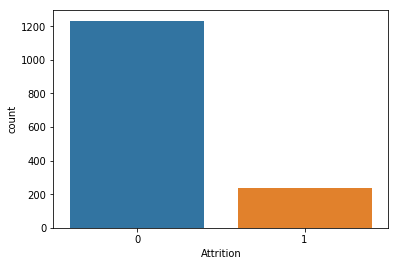

In [8]:
sns.countplot(att_dataset.Attrition)

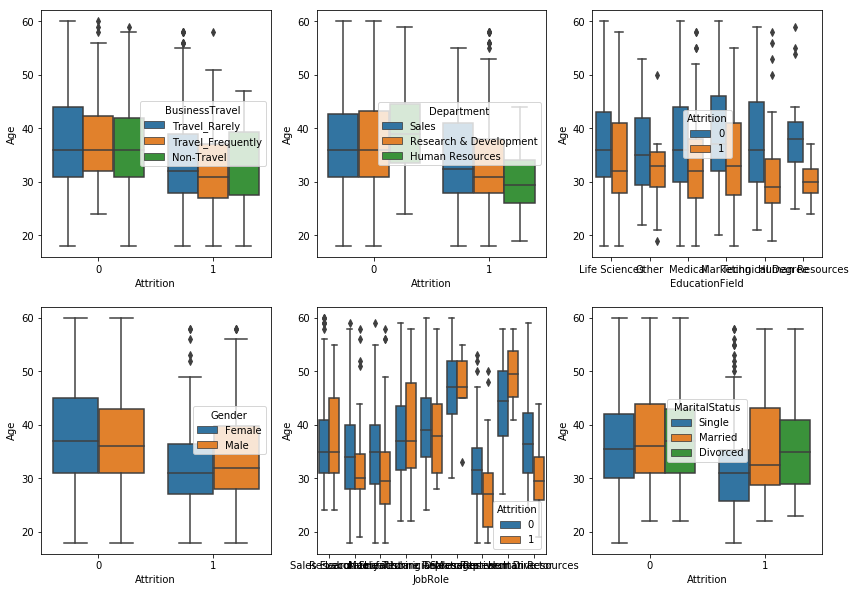

In [9]:
plt.figure(figsize=(14,10))
plt.subplot(2,3,1)
sns.boxplot(att_dataset.Attrition,att_dataset.Age,hue=att_dataset.BusinessTravel)
plt.subplot(2,3,2)
sns.boxplot(att_dataset.Attrition,att_dataset.Age,hue=att_dataset.Department)
plt.subplot(2,3,3)
sns.boxplot(att_dataset.EducationField,att_dataset.Age,hue=att_dataset.Attrition)
plt.subplot(2,3,4)
sns.boxplot(att_dataset.Attrition,att_dataset.Age,hue=att_dataset.Gender)
plt.subplot(2,3,5)
sns.boxplot(att_dataset.JobRole,att_dataset.Age,hue=att_dataset.Attrition)
plt.subplot(2,3,6)
sns.boxplot(att_dataset.Attrition,att_dataset.Age,hue=att_dataset.MaritalStatus)

In [10]:
#att_dataset.Over18.value_counts()
att_dataset.OverTime.value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

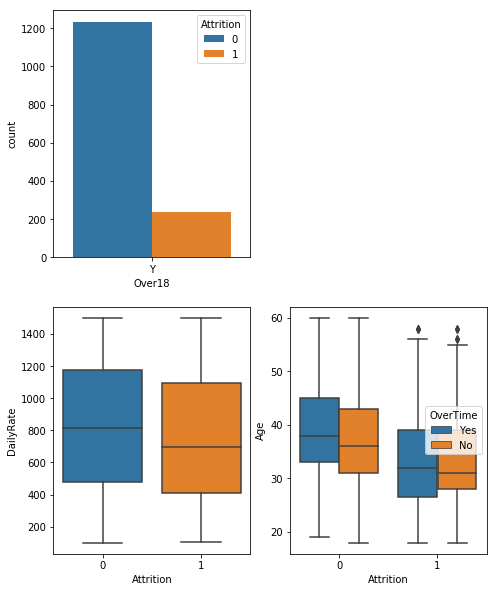

In [11]:
plt.figure(figsize=(12,10))
plt.subplot(2,3,1)
sns.countplot(att_dataset.Over18,hue=att_dataset.Attrition)
plt.subplot(2,3,4)
sns.boxplot(att_dataset.Attrition,att_dataset.DailyRate)
plt.subplot(2,3,5)
sns.boxplot(att_dataset.Attrition,att_dataset.Age,hue=att_dataset.OverTime)

In [12]:
att_dataset.Education.value_counts()

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

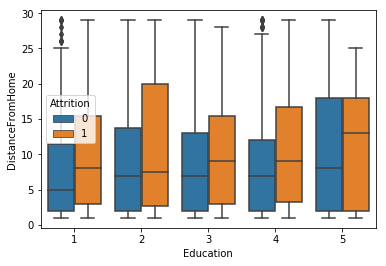

In [13]:
sns.boxplot(att_dataset.Education,att_dataset.DistanceFromHome,hue=att_dataset.Attrition)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0EAF6DB0>,
      dtype=object)

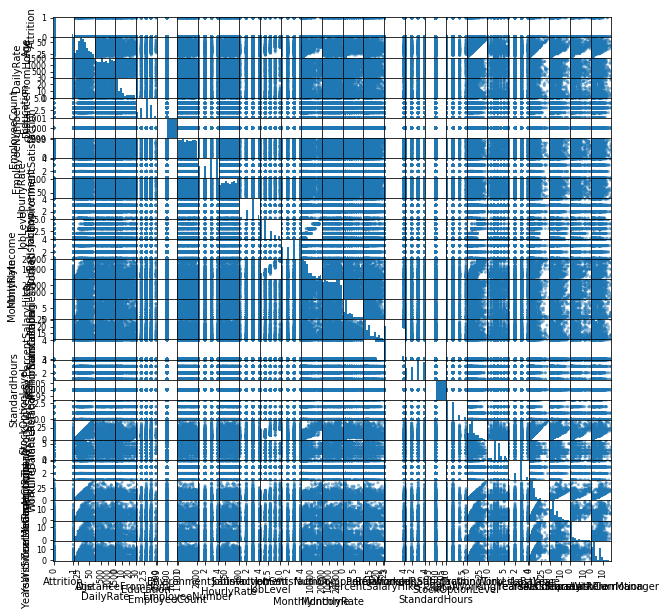

In [14]:
pd.plotting.scatter_matrix(att_dataset,figsize=(10,10))

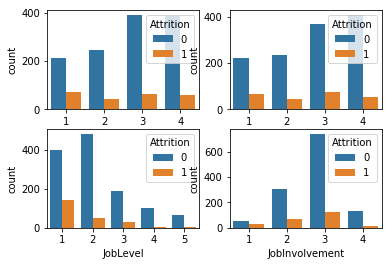

In [15]:
plt.subplot(2,2,1)
sns.countplot(att_dataset.EnvironmentSatisfaction,hue=att_dataset.Attrition)
plt.subplot(2,2,2)
sns.countplot(att_dataset.JobSatisfaction,hue=att_dataset.Attrition)
plt.subplot(2,2,3)
sns.countplot(att_dataset.JobLevel,hue=att_dataset.Attrition)
plt.subplot(2,2,4)
sns.countplot(att_dataset.JobInvolvement,hue=att_dataset.Attrition)

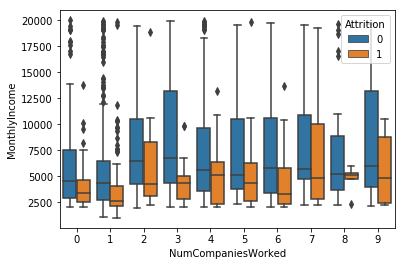

In [16]:
sns.boxplot(att_dataset.NumCompaniesWorked,att_dataset.MonthlyIncome,hue=att_dataset.Attrition)

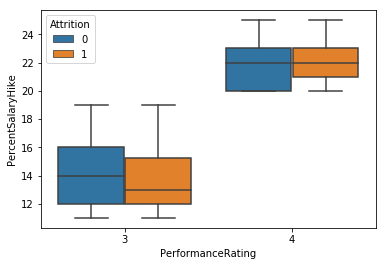

In [17]:
sns.boxplot(att_dataset.PerformanceRating,att_dataset.PercentSalaryHike,hue=att_dataset.Attrition)

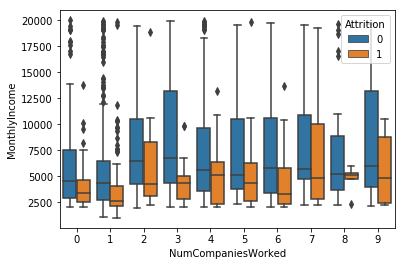

In [18]:
sns.boxplot(att_dataset.NumCompaniesWorked,att_dataset.MonthlyIncome,hue=att_dataset.Attrition)

Text(0,0.5,'Years In Current Role')

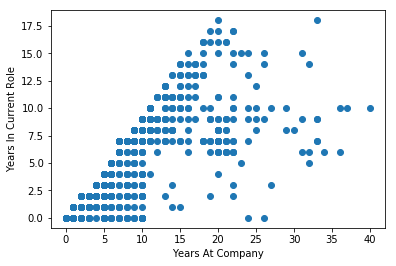

In [19]:
plt.scatter(att_dataset.YearsAtCompany,att_dataset.YearsInCurrentRole)
plt.xlabel("Years At Company")
plt.ylabel("Years In Current Role")

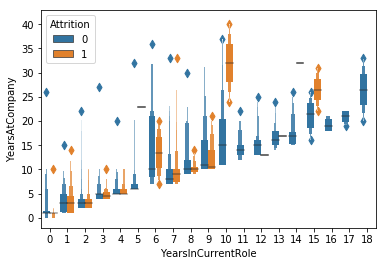

In [20]:
plt.Figure(figsize=(12,10))
sns.lvplot(att_dataset.YearsInCurrentRole,att_dataset.YearsAtCompany,hue=att_dataset.Attrition)

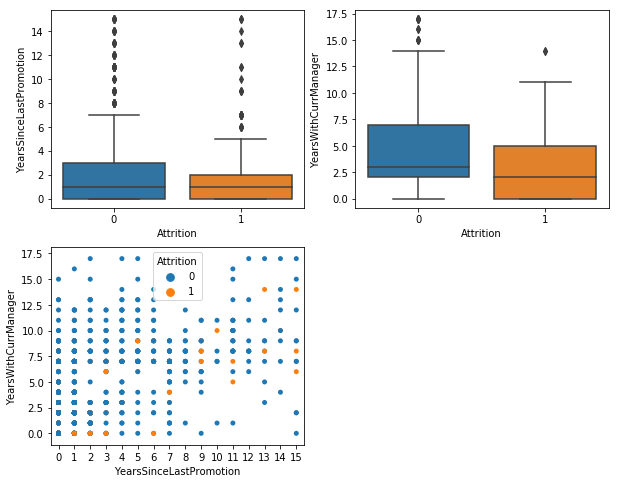

In [21]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.boxplot(att_dataset.Attrition,att_dataset.YearsSinceLastPromotion)
plt.subplot(2,2,2)
sns.boxplot(att_dataset.Attrition,att_dataset.YearsWithCurrManager)
plt.subplot(2,2,3)
sns.stripplot(att_dataset.YearsSinceLastPromotion,att_dataset.YearsWithCurrManager,hue=att_dataset.Attrition)

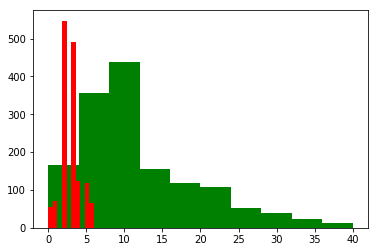

In [22]:
plt.hist(att_dataset.TotalWorkingYears,color = 'green')
plt.hist(att_dataset.TrainingTimesLastYear,color = 'red')
plt.show()


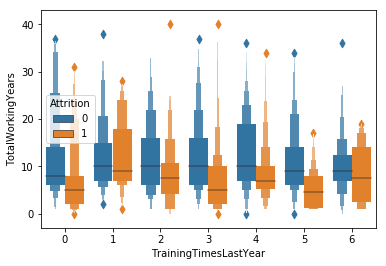

In [23]:
sns.lvplot(att_dataset.TrainingTimesLastYear,att_dataset.TotalWorkingYears,hue=att_dataset.Attrition)
#sns.boxplot(att_dataset.TrainingTimesLastYear,att_dataset.TotalWorkingYears,hue=att_dataset.Attrition)

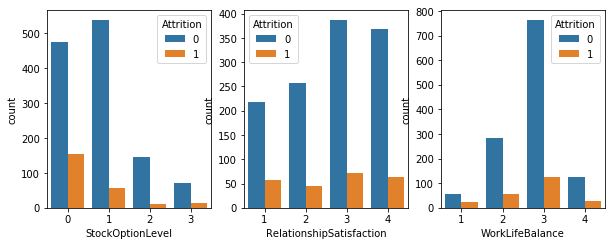

In [24]:
plt.figure(figsize=(10,8))
plt.subplot(2,3,1)
sns.countplot(att_dataset.StockOptionLevel,hue=att_dataset.Attrition)
plt.subplot(2,3,2)
sns.countplot(att_dataset.RelationshipSatisfaction,hue=att_dataset.Attrition)
plt.subplot(2,3,3)
sns.countplot(att_dataset.WorkLifeBalance,hue=att_dataset.Attrition)

In [25]:
att_dataset.head()


,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,0,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,1,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,0,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,0,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [26]:
att_dataset.Gender.value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [27]:

att_dataset['Gender'].replace(['Female','Male'],[0,1],inplace=True)

In [28]:
att_dataset["OverTime"].replace(['No','Yes'],[0,1],inplace=True)

In [29]:
att_dataset = att_dataset.drop(['Over18'],axis=1)

In [30]:
att_dataset = att_dataset.drop(['StandardHours'],axis=1)


In [31]:
att_dataset = att_dataset.drop(['DailyRate'],axis=1)


In [32]:
att_dataset = att_dataset.drop(['EmployeeCount'],axis=1)

In [33]:
att_dataset = att_dataset.drop(['EmployeeNumber'],axis=1)

In [34]:
att_dataset = pd.get_dummies(att_dataset,columns=["BusinessTravel","Department","EducationField","MaritalStatus","JobRole"])

In [35]:
att_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 49 columns):
Attrition                            1470 non-null int64
Age                                  1470 non-null int64
DistanceFromHome                     1470 non-null int64
Education                            1470 non-null int64
EnvironmentSatisfaction              1470 non-null int64
Gender                               1470 non-null int64
HourlyRate                           1470 non-null int64
JobInvolvement                       1470 non-null int64
JobLevel                             1470 non-null int64
JobSatisfaction                      1470 non-null int64
MonthlyIncome                        1470 non-null int64
MonthlyRate                          1470 non-null int64
NumCompaniesWorked                   1470 non-null int64
OverTime                             1470 non-null int64
PercentSalaryHike                    1470 non-null int64
PerformanceRating                    1

In [36]:
att_dataset.shape

(1470, 49)

RFE

In [37]:
X=att_dataset.drop(['Attrition'],axis=1).values
y=att_dataset['Attrition'].values


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
y_test = y_test.reshape(-1,1)
y_train = y_train.reshape(-1,1)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)


lr = LogisticRegression()
#from sklearn.feature_selection import RFE

rfe = RFE(lr,35)

rfe = rfe.fit(X_train,y_train)
print(rfe.ranking_)

print(rfe.support_) 
print(att_dataset.drop(['Attrition'],axis=1).columns)

(1029, 48) (441, 48) (1029, 1) (441, 1)
[ 9  6  8  1  1 12  1  1  1 13 14  1  1  5  1  1  1  4  1  1  3  1  1  1
  1  1  1  7  1  1  1  1  1  1 10  1  2  1  1  1  1  1  1  1  1 11  1  1]
[False False False  True  True False  True  True  True False False  True
  True False  True  True  True False  True  True False  True  True  True
  True  True  True False  True  True  True  True  True  True False  True
 False  True  True  True  True  True  True  True  True False  True  True]
Index(['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
       'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTra

In [44]:
X_train_new = X_train[:,rfe.support_]
print(X_train_new.shape)

X_test_new = X_test[:,rfe.support_]
print(X_train_new.shape)

logreg1 = LogisticRegression()
logreg1.fit(X_train_new,y_train)

y_pred_train1 = logreg1.predict(X_train_new)
y_pred_test1 = logreg1.predict(X_test_new)

acc_train = accuracy_score(y_train,y_pred_train1)
print("Traning Accuracy: ",acc_train)

acc_test = accuracy_score(y_test,y_pred_test1)
print("Testing Accuracy: ",acc_test)

(1029, 35)
(1029, 35)
Traning Accuracy:  0.8794946550048591
Testing Accuracy:  0.8820861678004536


In [45]:
# KNN

X_train_new = X_train[:,rfe.support_]
print(X_train_new.shape)

X_test_new = X_test[:,rfe.support_]
print(X_train_new.shape)

knn1 = KNeighborsClassifier(n_neighbors=5)
knn1.fit(X_train_new,y_train)

y_pred_train2 = knn1.predict(X_train_new)
y_pred_test2 = knn1.predict(X_test_new)

acc_train = accuracy_score(y_train,y_pred_train2)
print("Traning Accuracy: ",acc_train)

acc_test = accuracy_score(y_test,y_pred_test2)
print("Testing Accuracy: ",acc_test)

(1029, 35)
(1029, 35)
Traning Accuracy:  0.8707482993197279
Testing Accuracy:  0.8594104308390023


In [46]:
# Naive Bayes

X_train_new = X_train[:,rfe.support_]
print(X_train_new.shape)

X_test_new = X_test[:,rfe.support_]
print(X_train_new.shape)

mnb1 = MultinomialNB(alpha=10)
mnb1.fit(X_train_new,y_train)

y_pred_train = mnb1.predict(X_train_new)
y_pred_test = mnb1.predict(X_test_new)

acc_train = accuracy_score(y_train,y_pred_train)
print("Traning Accuracy: ",acc_train)

acc_test = accuracy_score(y_test,y_pred_test)
print("Testing Accuracy: ",acc_test)

(1029, 35)
(1029, 35)
Traning Accuracy:  0.8095238095238095
Testing Accuracy:  0.8208616780045351


In [47]:
X_train_new = X_train[:,rfe.support_]
print(X_train_new.shape)

X_test_new = X_test[:,rfe.support_]
print(X_train_new.shape)

bnb1 = BernoulliNB(alpha=10)
bnb1.fit(X_train_new,y_train)

y_pred_train3 = bnb1.predict(X_train_new)
y_pred_test3 = bnb1.predict(X_test_new)

acc_train = accuracy_score(y_train,y_pred_train3)
print("Traning Accuracy: ",acc_train)

acc_test = accuracy_score(y_test,y_pred_test3)
print("Testing Accuracy: ",acc_test)

(1029, 35)
(1029, 35)
Traning Accuracy:  0.8522837706511176
Testing Accuracy:  0.8458049886621315


In [48]:
X_train_new = X_train[:,rfe.support_]
print(X_train_new.shape)

X_test_new = X_test[:,rfe.support_]
print(X_train_new.shape)

svm1 = SVC()
svm1.fit(X_train_new,y_train)

y_pred_train4 = svm1.predict(X_train_new)
y_pred_test4 = svm1.predict(X_test_new)

acc_train = accuracy_score(y_train,y_pred_train4)
print("Traning Accuracy: ",acc_train)

acc_test = accuracy_score(y_test,y_pred_test4)
print("Testing Accuracy: ",acc_test)

(1029, 35)
(1029, 35)
Traning Accuracy:  0.86977648202138
Testing Accuracy:  0.8594104308390023


In [49]:
X_train_new = X_train[:,rfe.support_]
print(X_train_new.shape)

X_test_new = X_test[:,rfe.support_]
print(X_train_new.shape)

dtc1 = DecisionTreeClassifier()
dtc1.fit(X_train_new,y_train)

y_pred_train5 = dtc1.predict(X_train_new)
y_pred_test5 = dtc1.predict(X_test_new)

acc_train = accuracy_score(y_train,y_pred_train5)
print("Traning Accuracy: ",acc_train)

acc_test = accuracy_score(y_test,y_pred_test5)
print("Testing Accuracy: ",acc_test)

#Overtfitting

(1029, 35)
(1029, 35)
Traning Accuracy:  1.0
Testing Accuracy:  0.8049886621315193


In [50]:
#Decision TRee

X_train_new = X_train[:,rfe.support_]
print(X_train_new.shape)

X_test_new = X_test[:,rfe.support_]
print(X_train_new.shape)

rfc1 = RandomForestClassifier()
rfc1.fit(X_train_new,y_train)

y_pred_train = rfc1.predict(X_train_new)
y_pred_test = rfc1.predict(X_test_new)

acc_train = accuracy_score(y_train,y_pred_train)
print("Traning Accuracy: ",acc_train)

acc_test = accuracy_score(y_test,y_pred_test)
print("Testing Accuracy: ",acc_test)

#Overtfitting

(1029, 35)
(1029, 35)
Traning Accuracy:  0.9863945578231292
Testing Accuracy:  0.8616780045351474


In [51]:
#SVM

X_train_new = X_train[:,rfe.support_]
print(X_train_new.shape)

X_test_new = X_test[:,rfe.support_]
print(X_train_new.shape)

rfc1 = SVC()
rfc1.fit(X_train_new,y_train)

y_pred_train6 = rfc1.predict(X_train_new)
y_pred_test6 = rfc1.predict(X_test_new)

acc_train = accuracy_score(y_train,y_pred_train6)
print("Traning Accuracy: ",acc_train)

acc_test = accuracy_score(y_test,y_pred_test6)
print("Testing Accuracy: ",acc_test)

(1029, 35)
(1029, 35)
Traning Accuracy:  0.86977648202138
Testing Accuracy:  0.8594104308390023


#Model Evaluation

In [52]:
#Logistic regression is the best Model
print("Classifiication Report = ", classification_report(y_test,y_pred_test1))

Classifiication Report =               precision    recall  f1-score   support

          0       0.90      0.97      0.93       371
          1       0.74      0.40      0.52        70

avg / total       0.87      0.88      0.87       441



In [53]:
from sklearn.metrics import roc_auc_score,roc_curve

In [57]:
y_test_prob = logreg1.predict_proba(X_test_new)

prob = y_test_prob[:,1]

In [59]:
fpr,tpr,threshold = roc_curve(y_test,prob)

print(fpr.shape)
print(tpr.shape)
print(threshold)

(85,)
(85,)
[0.84954077 0.69594077 0.69084242 0.66503677 0.65507874 0.6516138
 0.64972376 0.64406854 0.63741236 0.59923713 0.59080645 0.58690063
 0.5437851  0.53925862 0.53658604 0.51436749 0.48772434 0.4793869
 0.45654558 0.45625449 0.45148403 0.43301762 0.42696055 0.42454311
 0.41959121 0.4158413  0.36972261 0.35281893 0.31000527 0.30787551
 0.29421258 0.29176313 0.28897692 0.28523529 0.27261725 0.26564859
 0.23570359 0.23444426 0.23072933 0.22907614 0.22498958 0.22131821
 0.21954593 0.2189737  0.21727023 0.21394739 0.18727176 0.18178586
 0.17713365 0.17493623 0.17261255 0.17245197 0.15545799 0.15339159
 0.14484813 0.14320935 0.14071675 0.14020854 0.13054152 0.12797088
 0.11325772 0.11224026 0.09803156 0.09758869 0.09637096 0.09498235
 0.09143983 0.09004521 0.07956581 0.07955471 0.07770009 0.07650613
 0.07543741 0.07499836 0.07370433 0.07369779 0.03567273 0.03566451
 0.02151926 0.02139276 0.02078993 0.02072192 0.00543822 0.00529906
 0.00087161]


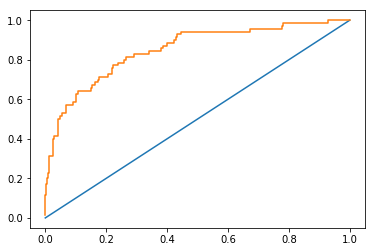

In [62]:
plt.plot([0,1],[0,1])

plt.plot(fpr,tpr)
plt.show()

In [63]:
roc_auc_score(y_test,prob)

0.8500962649210627